### Imputaciónes Simples
- Imputación por la medio o mediana, si hay muchos datos faltantes esto puede cambiar la desviación de los datos por lo cual no es aconsejable 
- Imputación por regresión (el valor se cambia por un valor predicho por un modelo de regresión combinando la informaciónm de las columnas o variables faltantes con columnas donde los datos están completos)
- Imputación Hot-Deck  KNN (key nearest neigborg reemplaza los datos faltantes por datos vecinos) se usa cuando no se puede garantizar correlación entre los datos 

### Imputaciones Multiples

- MICE: Multiple Imputation by Chain Equations (las variables tienen que estar relacionadas linealmente)

Se debe identificar la correlación de los datos

# Exploración de datos

* Tener clara la pregunta que queremos responder;
* Tener una idea general de nuestro dataset;
* Definir los tipos de datos que tenemos;
* Elegir el tipo de estadística descriptiva
* Visualizar los datos;
* Analizar las posibles interacciones entre las variables del dataset; y finalmente
* Extraer algunas conclusiones de todo este análisis.

### Tipos de datos

Los siguientes datos son obtenidos del archivo "clean_df.csv"

- initial_sal_ Initial salary offered 
- final_sal Final salary offered
- mean_salary Mean salary obtained from the first two columns
- period Period of time year, month, week , hour that the payment of the salary is stablished
- period_cond The contions offered acroding to the job
- job The position that the persons is taking
- job_type The type of job full time, part time....
- city City where the person has to work
- state The State of the city
- organization_ Name of the organization
- org_desc Description of the organization
- sector_ Sector that the organization belongs to
- sector_level Level of the position like manager or support
- benefits Benefits offered by the organization

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('clean_df.csv',encoding="utf-8")
#Carga de datos a un dataframe en pandas

In [3]:
df = df.set_index('uniq_id')
df.head(5)
# Before doing anything we are going to ser the column 'uniq_id' as an index, this way we are noi going to have integrity issues when makin join o merge

,initial_sal_,final_sal,mean_salary,period,period_cond,job,job_type,city,state,organization_,org_desc,sector_,sector_level,benefits
uniq_id,,,,,,,,,,,,,,
58435fcab804439efdcaa7ecca0fd783,0.0,0.0,0.0,NaN,NaN,engineer,full time,dixon,ca,Altec,Industries,Experienced,(Non-Manager),NaN
64d0272dc8496abfd9523a8df63c184c,0.0,0.0,0.0,NaN,NaN,shift supervisor,full time,camphill,pa,Retail,NaN,Project/Program,Management,NaN
1e2637cb5f7a2c4615a99a26c0566c66,0.0,0.0,0.0,NaN,NaN,construction pm,full time,charlottesville,va,Computer,IT Services,Experienced,(Non-Manager),NaN
a6a2b5e825b8ce1c3b517adb2497c5ed,0.0,0.0,0.0,NaN,NaN,housekeeper,part time,austin,tx 78746,Hotels,Lodging Personal Household Services,Customer,Support/Client Care,NaN
2f8bdf60db4d85627ab8f040e67aa78d,0.0,0.0,0.0,NaN,NaN,aflac insurance sales agent,full time,berryville,va 22611,Insurance,NaN,Customer,Support/Client Care,NaN


Los tipos de datos pueden ser:
- numericos:
    * discretos (Toman solo valores enteros como la edad)
    * continuos (Pueden tomar valor dentro de un intervalo como el salario)
- Categoricos
    * binarios (undican una de dos posibles categorias 1 o 0 paso la materia o no)
    * nominales (etiquetan el dato pero no pueden ser ordenados o medidos como el genero, hombre, mujer o .......)
    * ordinales (Corresponden al orden en que vienen los dato)

In [4]:
df.dtypes
#Tipos de datos
# Variables númericas continuos: initial_sal_ , final_sal   ,mean_salary
# Period, jobtype are nominales can be both sorted or measured
# Variables categoricas El resto de las varibales que puedes encontral en la lista que arroja 'dtypes'

initial_sal_     float64
final_sal        float64
mean_salary      float64
period            object
period_cond       object
job               object
job_type          object
city              object
state             object
organization_     object
org_desc          object
sector_           object
sector_level      object
benefits          object
dtype: object

### Descripción estadistica
 Se utilizan medidas:
 - Tendencia central
    * media (se puede aplicar a datos discretos o continuos pero sensible a valores atipicos o sesgados)
    * mediana (soluciona el problema de la media y sirve también para datos duscretos u ordinales)
    

 - Verificación de variabilidad de los datos (que tanto se elejan los datos de la media o la mediana):
    * Desviación estandar (entre mas bajo el valor los datos estan mas agrupados, sensible a datos sesgados)
    * Rango intercuartiles (diferencia entre el percentil 75 y percentil 25, menos sensible a datos sesgados )


In [5]:
df_data = df[df['mean_salary'] !=0]
df_data.head(5)

# We first chose the data with the mean salary diferent to cero, it means thereara a initial salary and an final salary an data in categorical variables
# we hace 1665 rows and 15 columns

,initial_sal_,final_sal,mean_salary,period,period_cond,job,job_type,city,state,organization_,org_desc,sector_,sector_level,benefits
uniq_id,,,,,,,,,,,,,,
b43c077756d5a326c4854e1399fd2464,900.0,1300.0,1100.0,hour,NaN,primrose private preschool teacher,full time,houston,tx 77098,Education,NaN,Entry,Level,NaN
d8491fcefe14d1398de419984dccf427,8000000.0,9500000.0,8750000.0,year,NaN,superintendent,full time,houston,tx,Construction,Industrial Facilities InfrastructureConstru...,Building,Construction/Skilled Trades,NaN
779bb4c9bf038b7fb775134736d36fd4,7000000.0,10000000.0,8500000.0,year,NaN,sr. process engineer,full time,sr. process engineer,manufacturing,Chicago,IL,Engineering,NaN,NaN
ceb44cca7cd280adcb0c84c20f3c6c21,6800000.0,7200000.0,7000000.0,year,NaN,rf system technician,full time temporary,rf system technician,field service,Oklahoma,City OK,Engineering,NaN,NaN
eea9b50afc4fece9f9d6ff0dbf659784,5800000.0,6500000.0,6150000.0,year,NaN,japanese and english speaking interpreter and ...,full time,charleston,wv,Manufacturing,Other,Experienced,(Non-Manager),NaN


In [6]:
df_data.shape

(1665, 14)

#### Find median
In order ot find the median we have to create clusters of the variables "type_job" an the "period" because is not the same the salary of a full time job, or hourly or weekly or per diem

In [7]:
df_data.isnull().sum()
# As we can see there are 134 nan values for period and 5 for job_type


initial_sal_        0
final_sal           0
mean_salary         0
period            134
period_cond      1370
job                 0
job_type            5
city                0
state              94
organization_       0
org_desc          163
sector_             0
sector_level      303
benefits         1412
dtype: int64

In [8]:
df_data = df_data.dropna(subset=['period', 'job_type'])

In [9]:
df_data.shape

(1526, 14)

In [10]:
df_data.isnull().sum()

initial_sal_        0
final_sal           0
mean_salary         0
period              0
period_cond      1232
job                 0
job_type            0
city                0
state              93
organization_       0
org_desc          151
sector_             0
sector_level      303
benefits         1273
dtype: int64

In [11]:
df_data['period'].unique()
# We identified the periods of tiem that will be clusteres

array(['hour', 'year', 'week', 'mont'], dtype=object)

In [12]:
df_data['job_type'].unique()
# We identified the job_type that will be clusteres

array(['full time', 'full time temporary', 'part time', 'temporary',
       'per diem', 'part time temporary'], dtype=object)

In [13]:
# Lets segregate the numeric data
num_data_cluster = df_data[['initial_sal_','final_sal','mean_salary','period','job_type']]
num_data_cluster.head(5)

# I think it would be easier to concatenate period and job_type to simplify the clusters

,initial_sal_,final_sal,mean_salary,period,job_type
uniq_id,,,,,
b43c077756d5a326c4854e1399fd2464,900.0,1300.0,1100.0,hour,full time
d8491fcefe14d1398de419984dccf427,8000000.0,9500000.0,8750000.0,year,full time
779bb4c9bf038b7fb775134736d36fd4,7000000.0,10000000.0,8500000.0,year,full time
ceb44cca7cd280adcb0c84c20f3c6c21,6800000.0,7200000.0,7000000.0,year,full time temporary
eea9b50afc4fece9f9d6ff0dbf659784,5800000.0,6500000.0,6150000.0,year,full time


In [14]:
num_data_cluster_ =num_data_cluster.copy()

num_data_cluster_.loc[:,'period_job'] = ""

num_data_cluster_

,initial_sal_,final_sal,mean_salary,period,job_type,period_job
uniq_id,,,,,,
b43c077756d5a326c4854e1399fd2464,900.0,1300.0,1100.0,hour,full time,
d8491fcefe14d1398de419984dccf427,8000000.0,9500000.0,8750000.0,year,full time,
779bb4c9bf038b7fb775134736d36fd4,7000000.0,10000000.0,8500000.0,year,full time,
ceb44cca7cd280adcb0c84c20f3c6c21,6800000.0,7200000.0,7000000.0,year,full time temporary,
eea9b50afc4fece9f9d6ff0dbf659784,5800000.0,6500000.0,6150000.0,year,full time,
...,...,...,...,...,...,...
4e2b0a3e9fe5f8721f6ab4692823d9a9,25000.0,0.0,25000.0,week,full time,
ac3c743eb7612d90bfe80a3a30d3d8be,5500000.0,6000000.0,5750000.0,year,full time,
8e9f8638556bc1fd671bb99f4f01ac4d,7500000.0,8500000.0,8000000.0,year,full time,


In [15]:

num_data_cluster_['period_job'] =  num_data_cluster_['period']+' '+num_data_cluster_['job_type']
num_data_cluster_ = num_data_cluster_.drop(['period','job_type'], axis=1)
num_data_cluster_['period_job'] = num_data_cluster_['period_job'].replace(' ', '_', regex=True)
num_data_cluster_

,initial_sal_,final_sal,mean_salary,period_job
uniq_id,,,,
b43c077756d5a326c4854e1399fd2464,900.0,1300.0,1100.0,hour_full_time
d8491fcefe14d1398de419984dccf427,8000000.0,9500000.0,8750000.0,year_full_time
779bb4c9bf038b7fb775134736d36fd4,7000000.0,10000000.0,8500000.0,year_full_time
ceb44cca7cd280adcb0c84c20f3c6c21,6800000.0,7200000.0,7000000.0,year_full_time_temporary
eea9b50afc4fece9f9d6ff0dbf659784,5800000.0,6500000.0,6150000.0,year_full_time
...,...,...,...,...
4e2b0a3e9fe5f8721f6ab4692823d9a9,25000.0,0.0,25000.0,week_full_time
ac3c743eb7612d90bfe80a3a30d3d8be,5500000.0,6000000.0,5750000.0,year_full_time
8e9f8638556bc1fd671bb99f4f01ac4d,7500000.0,8500000.0,8000000.0,year_full_time


In [16]:
num_data_cluster_[[	'initial_sal_'	,'final_sal',	'mean_salary']] = num_data_cluster_[[	'initial_sal_'	,'final_sal',	'mean_salary']].astype(int)
num_data_cluster_.dtypes

initial_sal_     int32
final_sal        int32
mean_salary      int32
period_job      object
dtype: object

In [17]:
list_period_job = num_data_cluster_['period_job'].unique()
list_period_job
#No we do have a list of the variables to create the clusters to examine data

array(['hour_full_time', 'year_full_time', 'year_full_time_temporary',
       'hour_part_time', 'hour_full_time_temporary', 'week_full_time',
       'hour_temporary', 'hour_per_diem', 'mont_full_time',
       'hour_part_time_temporary', 'mont_part_time', 'year_part_time'],
      dtype=object)

<Axes: xlabel='initial_sal_', ylabel='period_job'>

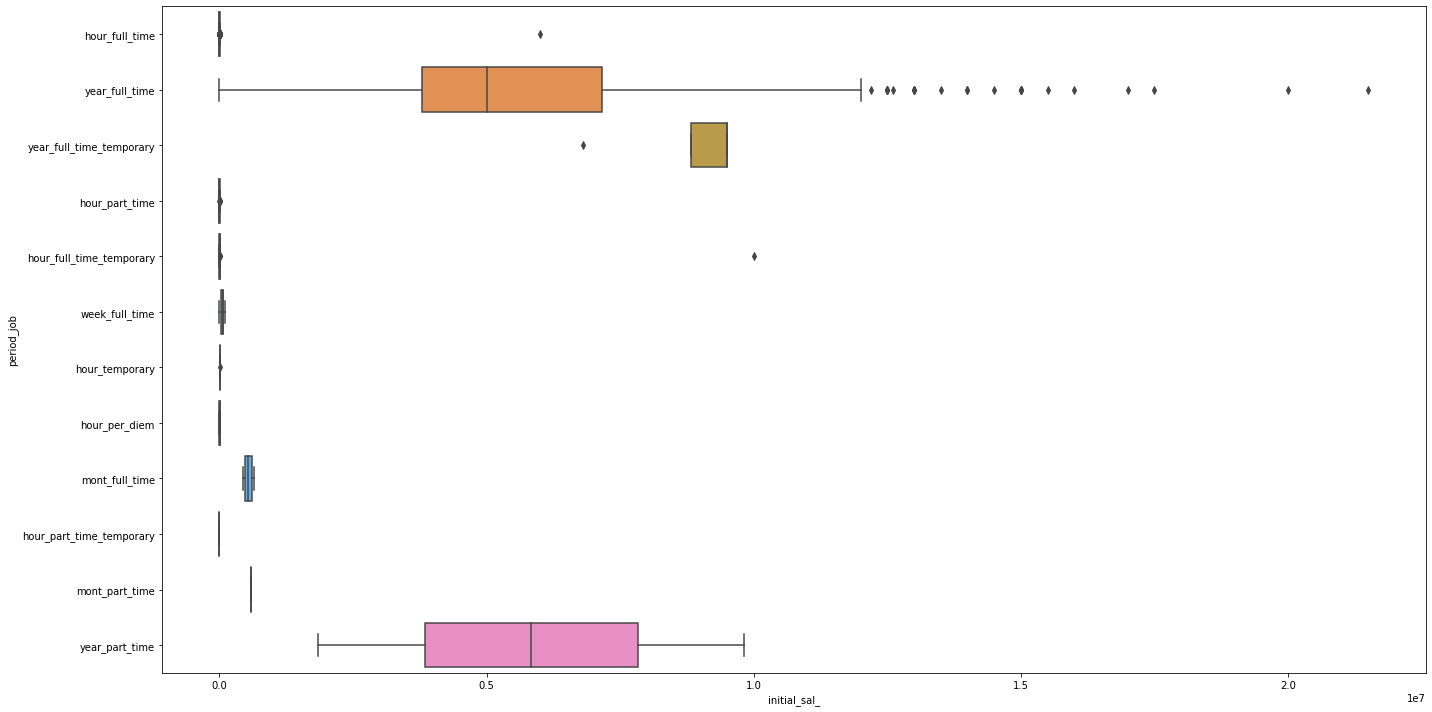

In [74]:
import seaborn as sns

# Box plot by group
sns.boxplot(x = num_data_cluster_['initial_sal_'],
            y = num_data_cluster_['period_job'])

In [18]:
d={}
for  i  in list_period_job:
    d[i]= num_data_cluster_[num_data_cluster_['period_job'].isin([i])]
   
print(d)

# Lets use a dictionary to separate each cluster that later will be a dataframe with its own period_job
# There are diferent ways to do this like create a dateframe with a conditional of the value of the variable "period_job" but lets have fun this way

{'hour_full_time':                                   initial_sal_  final_sal  mean_salary   
uniq_id                                                                  
b43c077756d5a326c4854e1399fd2464           900       1300         1100  \
3c2f7c555173e04db07a96b23c1be974          1375       1675         1525   
f884de2958f94e4ad417aefcacd350c7          1700       2200         1950   
776bd5c4c2412714ed9f1ac098470aac          1500       1900         1700   
64a597e5dd17740aadf4b0e8047b51a5          1500       2100         1800   
...                                        ...        ...          ...   
5310eafc4a142affdd10ab50de2c1cca          1500       1800         1650   
b5838e6822ee1ffd9174d41ba9ae7b9b          1400       1600         1500   
4a65f0199487728cc762abd524237360          1175       1275         1225   
292810c8b37005b3b49f84c790110594          2325       2521         2423   
40161cf61c283af9dc2b0a62947a5f1b          2500       2800         2650   

                  

In [19]:
def create_Dataframes(d, dict_dataframes):
    return d.get(dict_dataframes)
    

hour_full_time              =  create_Dataframes(d,list_period_job[0])
year_full_time              =  create_Dataframes(d,list_period_job[1])
year_full_time_temporary    =  create_Dataframes(d,list_period_job[2])
hour_part_time              =  create_Dataframes(d,list_period_job[3])
hour_full_time_temporary    =  create_Dataframes(d,list_period_job[4])
week_full_time              =  create_Dataframes(d,list_period_job[5])
hour_temporary              =  create_Dataframes(d,list_period_job[6])
hour_per_diem               =  create_Dataframes(d,list_period_job[7])
mont_full_time              =  create_Dataframes(d,list_period_job[8])
hour_part_time_temporary    =  create_Dataframes(d,list_period_job[9])
mont_part_time              =  create_Dataframes(d,list_period_job[10])
year_part_time              =  create_Dataframes(d,list_period_job[11])

# Finaly in this fucntion we extract each "period_job" so we can create some visualizations for each one


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

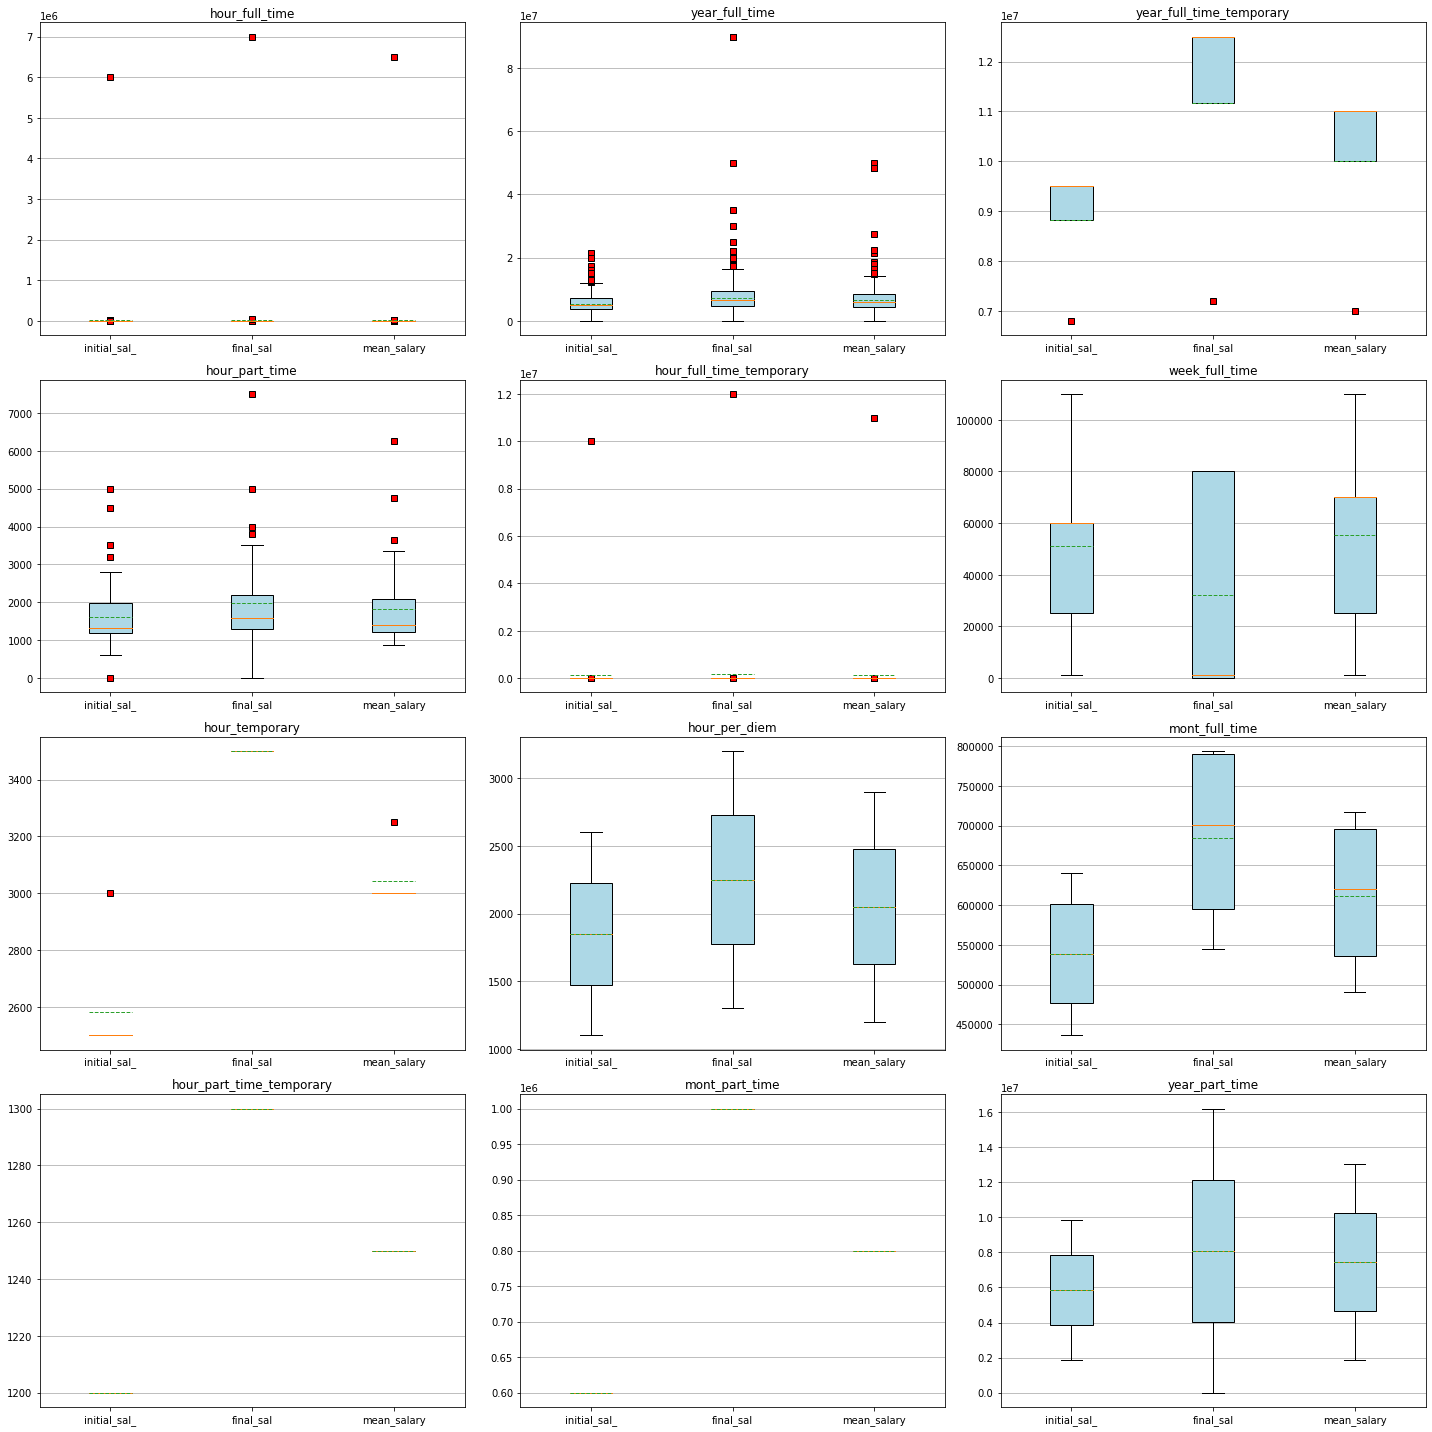

In [113]:
plt.rcParams["figure.figsize"] = [20,20]
plt.rcParams["figure.autolayout"] = True


fig, axs = plt.subplots(4,3)


labels=['initial_sal_','final_sal','mean_salary']
boxprops = dict(facecolor = "lightblue")
flierprops = dict(marker = "s", markerfacecolor = "red")


axs[0, 0].boxplot(hour_full_time[labels], flierprops = flierprops, showmeans = True, meanline = True , patch_artist = True,boxprops = boxprops, labels=labels)
axs[0, 0].set_title('hour_full_time')
axs[0, 0].yaxis.grid(True)

axs[0, 1].boxplot(year_full_time[labels], flierprops = flierprops,showmeans = True, meanline = True ,patch_artist = True, boxprops = boxprops , labels=labels)
axs[0, 1].set_title('year_full_time')
axs[0, 1].yaxis.grid(True)

axs[0, 2].boxplot(year_full_time_temporary[labels], flierprops = flierprops, showmeans = True, meanline = True , patch_artist = True,boxprops = boxprops, labels=labels)
axs[0, 2].set_title('year_full_time_temporary')
axs[0, 2].yaxis.grid(True)

axs[1, 0].boxplot(hour_part_time[labels], flierprops = flierprops,showmeans = True, meanline = True ,patch_artist = True, boxprops = boxprops , labels=labels)
axs[1, 0].set_title('hour_part_time')
axs[1, 0].yaxis.grid(True)

axs[1, 1].boxplot(hour_full_time_temporary[labels], flierprops = flierprops, showmeans = True, meanline = True , patch_artist = True,boxprops = boxprops, labels=labels)
axs[1, 1].set_title('hour_full_time_temporary')
axs[1, 1].yaxis.grid(True)

axs[1, 2].boxplot(week_full_time[labels], flierprops = flierprops,showmeans = True, meanline = True ,patch_artist = True, boxprops = boxprops , labels=labels)
axs[1, 2].set_title('week_full_time')
axs[1, 2].yaxis.grid(True)

axs[2, 0].boxplot(hour_temporary[labels], flierprops = flierprops, showmeans = True, meanline = True , patch_artist = True,boxprops = boxprops, labels=labels)
axs[2, 0].set_title('hour_temporary')
axs[2, 0].yaxis.grid(True)

axs[2, 1].boxplot(hour_per_diem[labels], flierprops = flierprops,showmeans = True, meanline = True ,patch_artist = True, boxprops = boxprops , labels=labels)
axs[2, 1].set_title('hour_per_diem')
axs[2, 1].yaxis.grid(True)

axs[2, 2].boxplot(mont_full_time[labels], flierprops = flierprops, showmeans = True, meanline = True , patch_artist = True,boxprops = boxprops, labels=labels)
axs[2, 2].set_title('mont_full_time')
axs[2, 2].yaxis.grid(True)

axs[3, 0].boxplot(hour_part_time_temporary[labels], flierprops = flierprops,showmeans = True, meanline = True ,patch_artist = True, boxprops = boxprops , labels=labels)
axs[3, 0].set_title('hour_part_time_temporary')
axs[3, 0].yaxis.grid(True)

axs[3, 1].boxplot(mont_part_time[labels], flierprops = flierprops, showmeans = True, meanline = True , patch_artist = True,boxprops = boxprops, labels=labels)
axs[3, 1].set_title('mont_part_time')
axs[3, 1].yaxis.grid(True)

axs[3, 2].boxplot(year_part_time[labels], flierprops = flierprops,showmeans = True, meanline = True ,patch_artist = True, boxprops = boxprops , labels=labels)
axs[3, 2].set_title('year_part_time')
axs[3, 2].yaxis.grid(True)


plt.show()

In [23]:
hour_full_time[hour_full_time['initial_sal_']>=8000]


,initial_sal_,final_sal,mean_salary,period_job
uniq_id,,,,
3d5cd30842813f5b26497a69cfdf177b,8400,8750,8575,hour_full_time
895cbcbd6dc0491a42b862bca5ed46fc,6000000,7000000,6500000,hour_full_time


### The problem

- Need to know about what’s most common, the ranges of distributions, etc.

#### DESCRIPTIVE STATISTICS!

In [27]:
print('valor minimo = ', min(hour_full_time['final_sal']))
print ('valor maximo = ', max(hour_full_time['final_sal']))
print ( 'valor medio = ' , hour_full_time['final_sal'].mean())

valor minimo =  0
valor maximo =  7000000
valor medio =  18047.972665148063


In [28]:
hour_full_time_final_sal = hour_full_time.sort_values(by=['initial_sal_','final_sal','mean_salary'])
hour_full_time_final_sal

,initial_sal_,final_sal,mean_salary,period_job
uniq_id,,,,
ef4bc09f3a8e068af367d073d08fb1eb,0,850,850,hour_full_time
e7530cc807f461c893a7f2bd5538fd8f,0,1200,1200,hour_full_time
03d9055c2dd195e7af5de2e8330d529e,0,1225,1225,hour_full_time
d0e9496ed5c55027bace76bb872f1fb4,0,1475,1475,hour_full_time
0028f736c2a518b2306c3c1094abe1a0,0,1500,1500,hour_full_time
...,...,...,...,...
6bf06ec85c8dabccb42bf19bcddc9257,6500,7500,7000,hour_full_time
ea60d6c8f3c2bdb29b0eb2c0c9cb3bae,7000,8500,7750,hour_full_time
bc7ef51d887b752b9638201e56265bf6,7500,10000,8750,hour_full_time


### Visualizar los datos

Para datos continuos y discretos podemos graficar un histograma que se obtiene:
* Organizando los datos en grupos 
* Realizar el conteo de datos en cada grupo
* Verificar si la información es normal (forma de campana) o sesgada (inclinada hacia uno de los lados)
* Realizar diagramas boxplots para verificar los datos sesgados (Tanto para datos continuos como discretos)
    - El extremos de bloxplot son los procentiles 25 y 75 por fuera estan los whisker que son el 25 o 75 + 1.25 el rango intercuartil
    - Mas alla de los extemos del boxplot están los outliers 

Para los datos Categoricos.
- Hacer un conteo de ocurrencias por cada categoria o el porcentaje que representa la categoria de datos


### Analisis Bivariado y Multivariado

Analisis Bivariado (compara de a dos variables para encontrar correlación)
    - analizar pares de variables usando una grafica de dispersion por ejemplo slario y organiación
    - Se pude analizar el indice de correlación donde un valor cercano a 1 = lineal -1=relacion lineal inversa cerca a 0=no correlación entre los datos
    - Puede ser la comparación de una variable categorica con una númerica (grafica boxplot, violin)
    - Se pueden comparar dos variables categoricas 

Analisis Multivariado (compara simultaneamente todos los pares de variables para encontrar correlación)
    - encontrar el indice de correlación en una matriz de correlación 

### Sumarización

extracción de conclusiones mas importantes
    - Frases mas cortas de la correlación o relación de variables 